# Gold

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
#warnings.filterwarnings('ignore', message='.*Pyarrow.*')

/var/folders/bb/q1_d_djj4rz129pq4pvmzcx80000gn/T/ipykernel_2872/2417849426.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Tasks

## 1. Read the data from the CSV file into a DataFrame called gold.

In [3]:
my_file = 'gold.csv'
gold = pd.read_csv(my_file)

## 2. Run the info() method, and note the data types of the two columns.

In [4]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


the two types of two columns are object, float64

## 3. Convert the Date column to the DateTime data type. Then, display the first five rows of data, and note that the dates are for the first of each month starting in 1950.

In [5]:
gold['Date'] = pd.to_datetime(gold['Date'])
print(gold.head())

        Date  Price
0 1950-01-01  34.73
1 1950-02-01  34.73
2 1950-03-01  34.73
3 1950-04-01  34.73
4 1950-05-01  34.73


## 4. Plot the data with a Pandas line plot.

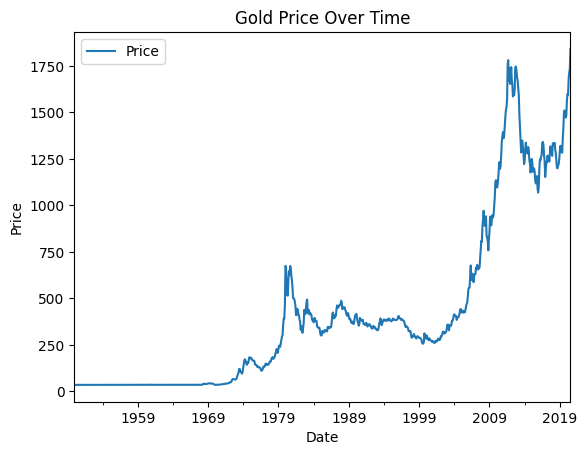

In [6]:
 # Plotting the data
gold.plot(x='Date', y='Price', kind='line')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## 5. Index the data on the Date column. Then, generate time periods for the first day of each yearfrom 1950 to 2020.

In [7]:
gold.set_index('Date', inplace=True)
time_periods = pd.date_range(start='1950-01-01', end='2020-12-31', freq='YS')

print(time_periods)

DatetimeIndex(['1950-01-01', '1951-01-01', '1952-01-01', '1953-01-01',
               '1954-01-01', '1955-01-01', '1956-01-01', '1957-01-01',
               '1958-01-01', '1959-01-01', '1960-01-01', '1961-01-01',
               '1962-01-01', '1963-01-01', '1964-01-01', '1965-01-01',
               '1966-01-01', '1967-01-01', '1968-01-01', '1969-01-01',
               '1970-01-01', '1971-01-01', '1972-01-01', '1973-01-01',
               '1974-01-01', '1975-01-01', '1976-01-01', '1977-01-01',
               '1978-01-01', '1979-01-01', '1980-01-01', '1981-01-01',
               '1982-01-01', '1983-01-01', '1984-01-01', '1985-01-01',
               '1986-01-01', '1987-01-01', '1988-01-01', '1989-01-01',
               '1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
      

### 6. Reindex the data using the new time periods, and display the first five rows again to see that there is just one row for each year

In [8]:
gold_reindexed = gold.reindex(time_periods)
gold_reindexed.head()


,Price
1950-01-01,34.73
1951-01-01,34.72
1952-01-01,34.49
1953-01-01,34.88
1954-01-01,34.86


### 7. Plot the reindexed data with a Pandas line plot.

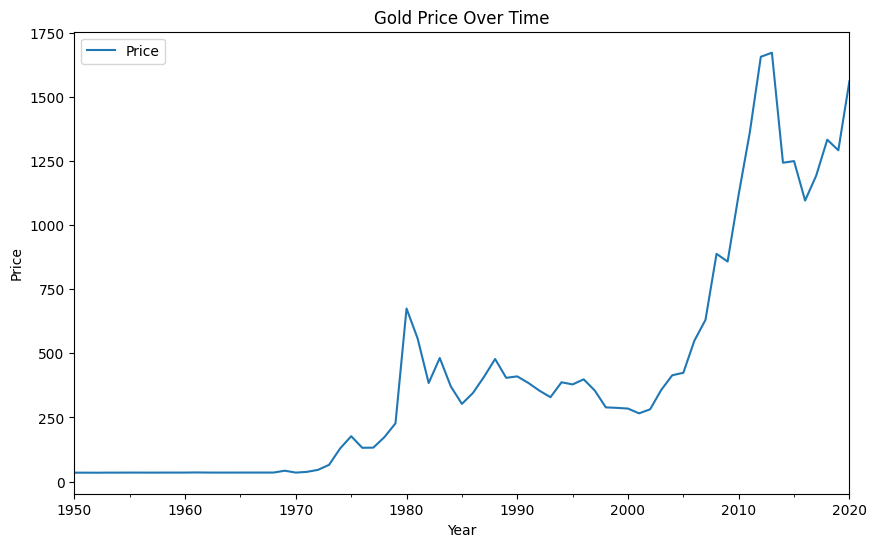

In [9]:
gold_reindexed.plot(kind='line', figsize=(10, 6))

plt.title('Gold Price Over Time')
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()

### 8. Resample the data to a quarterly frequency and plot the data again

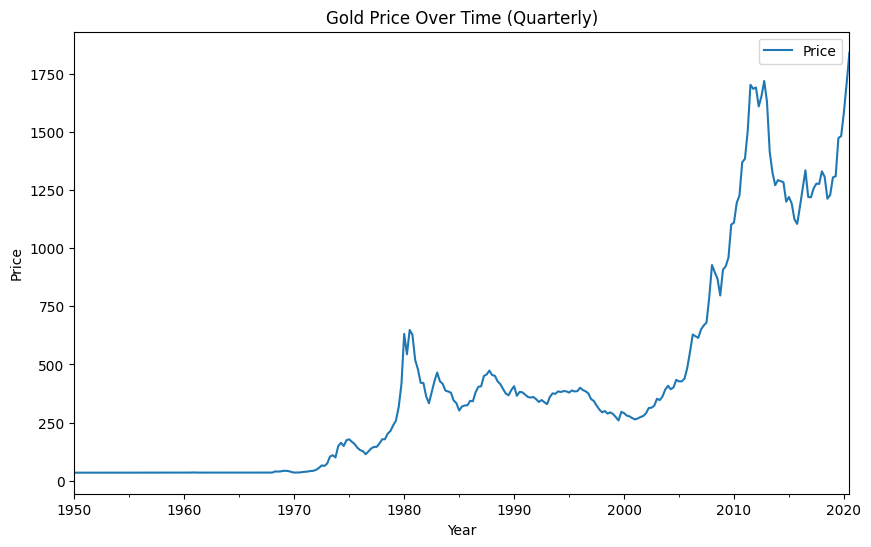

In [12]:
# Load the CSV file
file_path = 'gold.csv'
gold = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

gold_quarterly = gold.resample('QE').mean()

gold_quarterly.plot(kind='line', figsize=(10, 6))

plt.title('Gold Price Over Time (Quarterly)')
plt.ylabel('Price')
plt.xlabel('Year')

plt.show()

### 9. Resample the data to a yearly frequency and plot the data one more time.

/var/folders/bb/q1_d_djj4rz129pq4pvmzcx80000gn/T/ipykernel_78057/2290506192.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  gold_yearly = gold.resample('Y').mean()


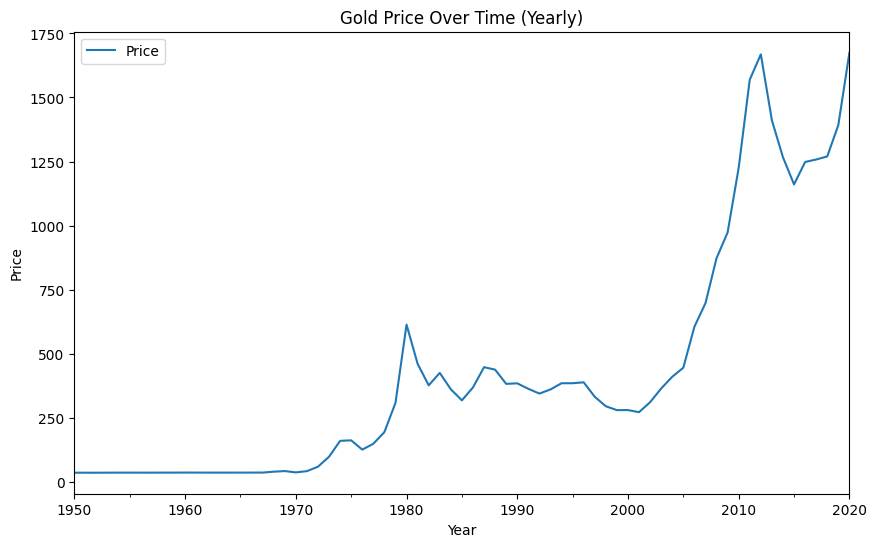

In [16]:
gold_yearly = gold.resample('Y').mean()

gold_yearly.plot(kind='line', figsize=(10, 6))

plt.title('Gold Price Over Time (Yearly)')
plt.ylabel('Price')
plt.xlabel('Year')

plt.show()

### 10. Plot the rolling mean for the data using a Pandas line plot. Experiment with different values for the window parameter

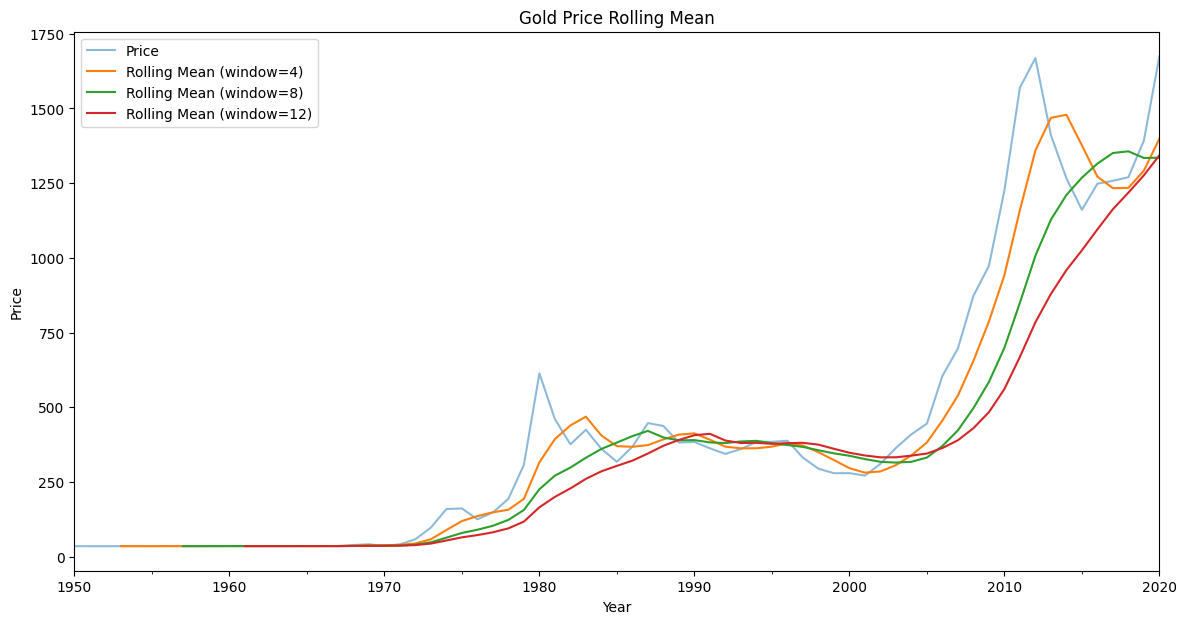

In [17]:
window_sizes = [4, 8, 12]

# Plot the original data
gold_yearly['Price'].plot(kind='line', figsize=(14, 7), alpha=0.5)

for window in window_sizes:
    rolling_mean = gold_yearly['Price'].rolling(window=window).mean()
    rolling_mean.plot(kind='line', figsize=(14, 7), label=f'Rolling Mean (window={window})')

# Add title and labels
plt.title('Gold Price Rolling Mean')
plt.ylabel('Price')
plt.xlabel('Year')
plt.legend()

plt.show()
